# KMeans Clustering

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv('Mall_Customers.csv')

data[:10]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


C:\Users\Goutham Reddy\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

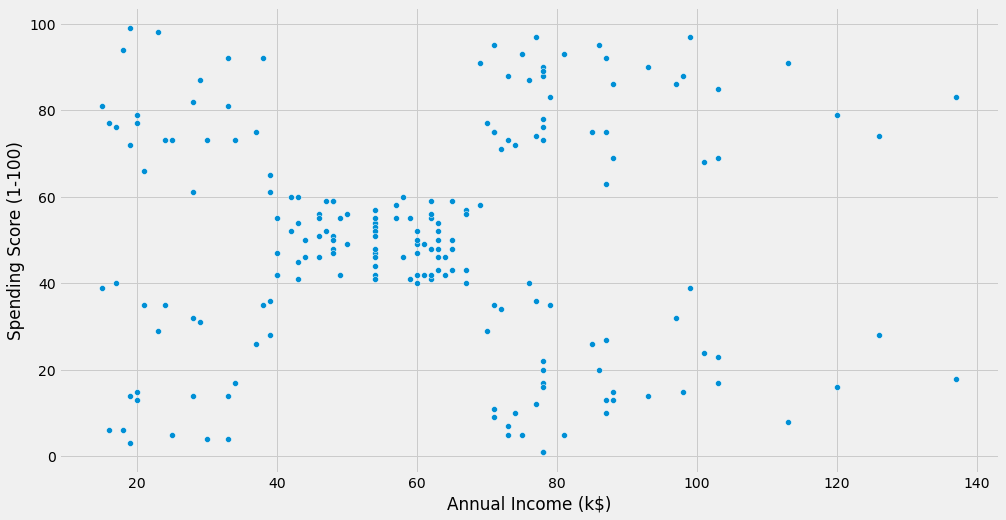

In [39]:
sns.scatterplot(data['Annual Income (k$)'], data['Spending Score (1-100)'])

In [42]:
x = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

print(x.shape)

(200, 2)


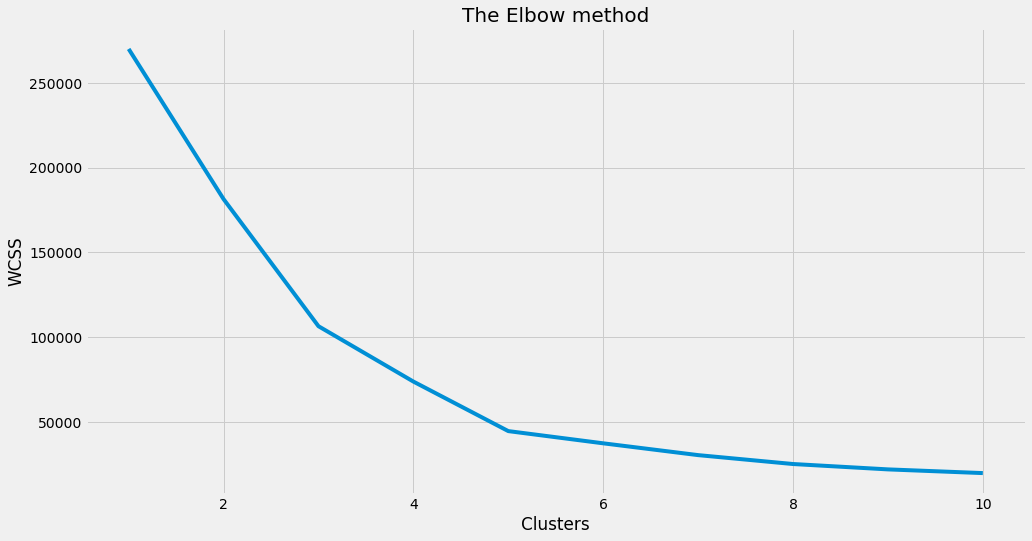

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title ('The Elbow method', fontsize = 20)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

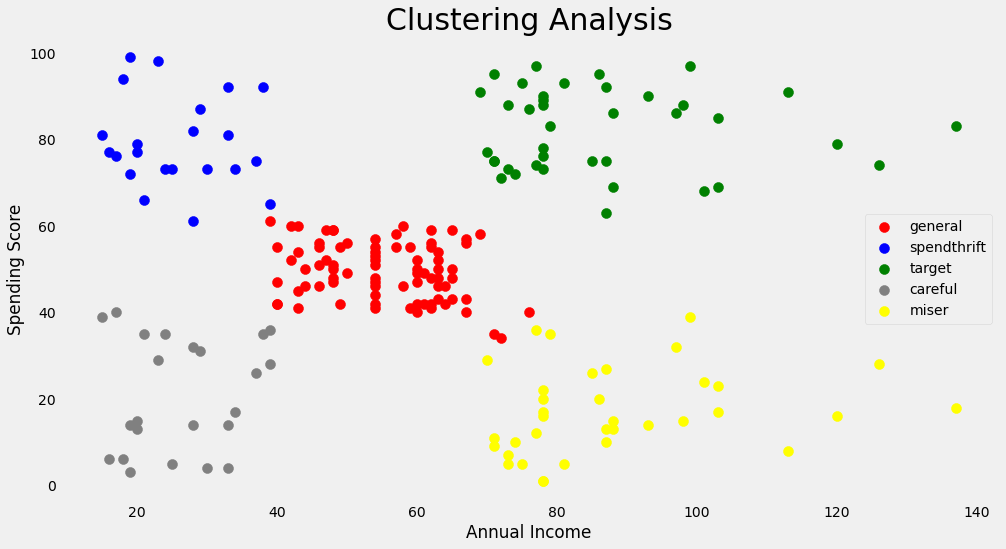

In [44]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'general')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'blue', label = 'spendthrift')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'green', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'grey', label = 'careful')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'yellow', label = 'miser')

plt.style.use('fivethirtyeight')
plt.title('Clustering Analysis', fontsize = 30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

### Silhouette Method for considering the optimal number of clusters (uses Euclidean distance method)

#### The range of the silhoutte value is between -1 to 1. A high value indicates that the point is placed in the correct cluster.

In [47]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x, km.labels_, metric = 'euclidean')

print('Silhouette Score: ', score)

Silhouette Score:  0.553931997444648


In [48]:
!pip install yellowbrick

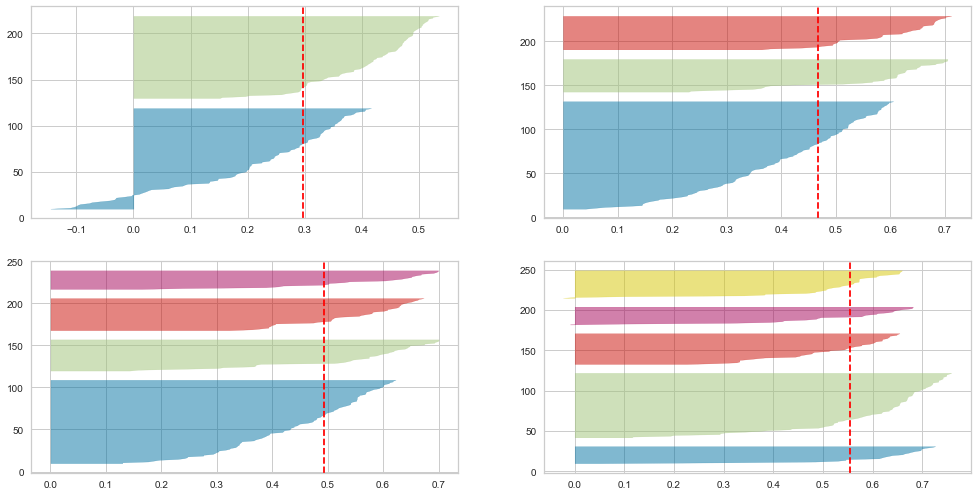

In [51]:
#### Yellow brick library helps us to visualize the clusters
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize = (15, 8))
for i in [2, 3, 4, 5]:
    #Create KMeans instance for different no. of clusters
    km = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 42)
    q, mod = divmod(i, 2)
    
    #create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

From the above plots we see that all the cluster scores are positive and we performed clustering well.

# Hierarchial Clustering

In [52]:
data[:10]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [53]:
x = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

print(x.shape)

(200, 2)


### for hierarchial clustering we use dendrograms to find out the no. of clusters

In [55]:
!pip install scipy

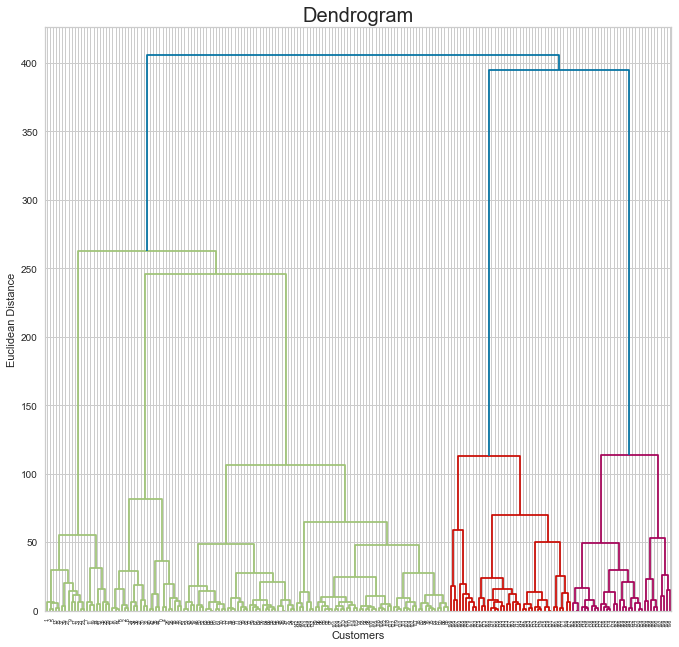

In [62]:
import scipy.cluster.hierarchy as sch

plt.rcParams['figure.figsize'] = (10, 10)

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

so from the above dendrogram we choose no. of clusters = 5. Because the horizontal line at 200 cuts all the lines in a better way

In [63]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

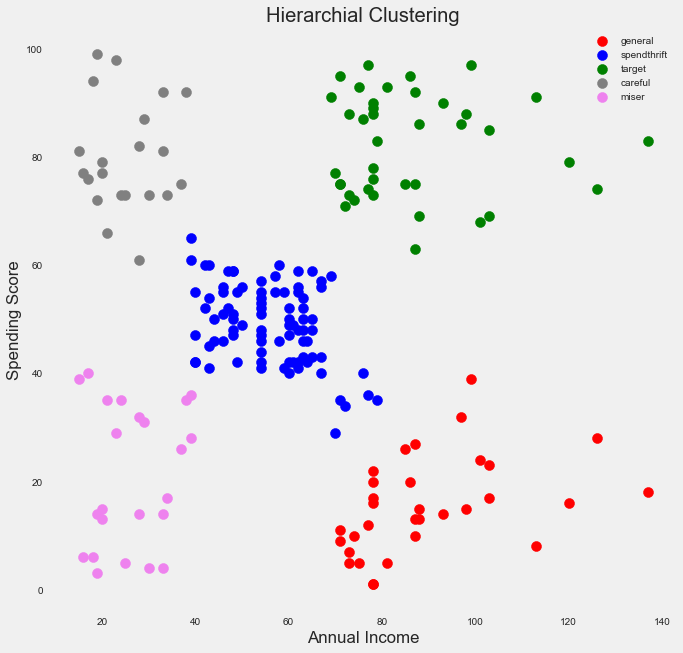

In [66]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label='general')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label='spendthrift')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label='target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'grey', label='careful')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'violet', label='miser')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# DBSCAN Clustering 
##### (Density Based Spatial Clustering of Applications with Noise)

### For seperating the clusters of high density from low density

In [68]:
x = data.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']].values

print(x.shape)

(200, 2)


Choose <b>MinPts</b> = 2*dim, where dim = the dimensions of your dataset

from the above data we have (200, 2), so MinPts = 2*2

Choose <b>eps</b>, we calaculate the distance from each point to its closest neighbor using the Nearest Neighbors

In [75]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

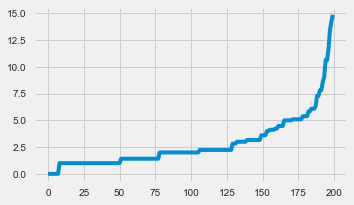

In [76]:
distances = np.sort(distances, axis= 0)
distances = distances[:,1]
plt.rcParams['figure.figsize'] = (5, 3)
plt.plot(distances)
plt.show()

from the above plot we find that maximum bend curve is at 8, so <b>eps</b> = 8

In [77]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 8, min_samples = 4)
clusters = dbscan.fit_predict(x)

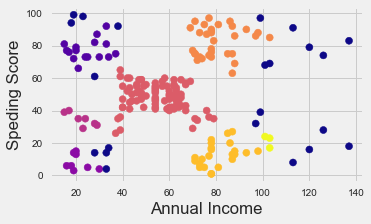

In [78]:
plt.scatter(x[:, 0], x[:, 1], c=clusters, cmap='plasma')
plt.xlabel('Annual Income')
plt.ylabel('Speding Score')
plt.show()